In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
#Loading of Dataset
df = pd.read_csv("C:/Users/Bunny/Downloads/AIML/KDDTrain+.txt")
test_df = pd.read_csv("C:/Users/Bunny/Downloads/AIML/KDDTest+.txt")

In [5]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [7]:
np.shape(df)

(125972, 44)

In [8]:
set(df['protocol_type'])

{'icmp', 'tcp', 'udp'}

In [9]:
set(df['attack'])

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'multihop',
 'neptune',
 'nmap',
 'normal',
 'perl',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'spy',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [10]:
set(df['service'])

{'IRC',
 'X11',
 'Z39_50',
 'aol',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'harvest',
 'hostnames',
 'http',
 'http_2784',
 'http_443',
 'http_8001',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois'}

In [12]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [14]:
set(df['attack_map'])

{0, 1, 2, 3, 4}

In [15]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [16]:
# create our target classifications
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.6)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.6)

In [17]:
binary_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50388 entries, 105540 to 48108
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   protocol_type_icmp   50388 non-null  bool 
 1   protocol_type_tcp    50388 non-null  bool 
 2   protocol_type_udp    50388 non-null  bool 
 3   service_IRC          50388 non-null  bool 
 4   service_X11          50388 non-null  bool 
 5   service_Z39_50       50388 non-null  bool 
 6   service_aol          50388 non-null  bool 
 7   service_auth         50388 non-null  bool 
 8   service_bgp          50388 non-null  bool 
 9   service_courier      50388 non-null  bool 
 10  service_csnet_ns     50388 non-null  bool 
 11  service_ctf          50388 non-null  bool 
 12  service_daytime      50388 non-null  bool 
 13  service_discard      50388 non-null  bool 
 14  service_domain       50388 non-null  bool 
 15  service_domain_u     50388 non-null  bool 
 16  service_echo         5

In [18]:
binary_train_X.sample(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
70463,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0,0
16112,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,201,458
32339,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,259,290
83961,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,204,601
23842,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [23]:
# model for the binary classification
binary_model = RandomForestClassifier()
binary_model.fit(binary_train_X, binary_train_y)
binary_predictions = binary_model.predict(binary_val_X)

# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,binary_val_y)
base_rf_score

0.9930805461473328

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the classification report
binary_classification_report = classification_report(binary_val_y, binary_predictions, target_names=['Normal', 'Attack'])
print("Classification Report:\n", binary_classification_report)

# Calculate the confusion matrix
binary_conf_matrix = confusion_matrix(binary_val_y, binary_predictions)
print("Confusion Matrix:\n", binary_conf_matrix)


Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.99      0.99     40377
      Attack       0.99      0.99      0.99     35207

    accuracy                           0.99     75584
   macro avg       0.99      0.99      0.99     75584
weighted avg       0.99      0.99      0.99     75584

Confusion Matrix:
 [[40057   320]
 [  203 35004]]


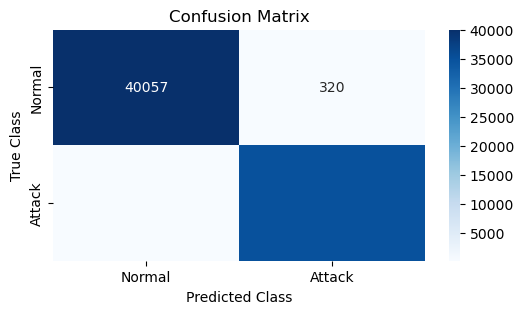

In [27]:
# Plotting the confusion matrix using heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(binary_conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
